Plotしてみる
- 映画数の年推移
  - xlabel = year
  - ylabel = count
- revenueの年推移（中央値、平均、最大値）
  - xlabel = year
  - ylabel = revenue

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データセットの読み込み
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
# release_date から yearを作成
df['year'] = pd.to_datetime(df['release_date'])
df['year'] = df['year'].dt.year

In [5]:
# year に 0があればNanに置換。その後Nanを除去
df['year'] = df['year'].apply(lambda x: np.nan if x == 0 else x)
df = df.dropna(subset=['year'])
len(df)

4802

## 1. 映画数の年推移

Text(0, 0.5, 'count')

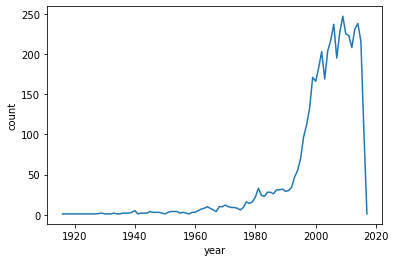

In [9]:
plt.plot(df.groupby('year')['id'].count())
plt.xlabel('year')
plt.ylabel('count')

## 2. revenueの年推移（中央値、平均、最大値）

In [10]:
# revenue が 0のものをNanにして除去
df['revenue'] = df['revenue'].apply(lambda x: np.nan if x == 0 else x)
df = df.dropna(subset=['revenue'])

<ipython-input-10-43b875a4afa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = df['revenue'].apply(lambda x: np.nan if x == 0 else x)


df = df[df['revenue'] != 0] の方がシンプル

In [16]:
# 統計量を計算
df_revenue_described = df.groupby('year').describe()['revenue']
df_revenue_described['median'] = df.groupby('year')['revenue'].median()
df_revenue_described

,count,mean,std,min,25%,50%,75%,max,median
year,,,,,,,,,
1916.0,1.0,8.394751e+06,NaN,8394751.0,8394751.0,8394751.0,8.394751e+06,8.394751e+06,8394751.0
1925.0,1.0,2.200000e+07,NaN,22000000.0,22000000.0,22000000.0,2.200000e+07,2.200000e+07,22000000.0
1927.0,1.0,6.504220e+05,NaN,650422.0,650422.0,650422.0,6.504220e+05,6.504220e+05,650422.0
1929.0,1.0,4.358000e+06,NaN,4358000.0,4358000.0,4358000.0,4.358000e+06,4.358000e+06,4358000.0
1930.0,1.0,8.000000e+06,NaN,8000000.0,8000000.0,8000000.0,8.000000e+06,8.000000e+06,8000000.0
...,...,...,...,...,...,...,...,...,...
2012.0,150.0,1.609447e+08,2.489353e+08,126.0,17175919.5,64793040.0,1.823324e+08,1.519558e+09,64793040.0
2013.0,163.0,1.436288e+08,2.209237e+08,11.0,18368283.0,63464861.0,1.513970e+08,1.274219e+09,63464861.0
2014.0,143.0,1.686748e+08,2.183760e+08,32251.0,28857328.0,80383290.0,2.191694e+08,1.091405e+09,80383290.0


Text(0, 0.5, 'revenue')

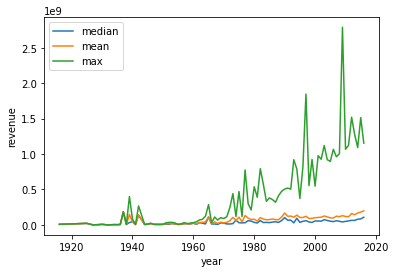

In [17]:
plt.plot('median', data=df_revenue_described)
plt.plot('mean', data=df_revenue_described)
plt.plot('max', data=df_revenue_described)
plt.legend()
plt.xlabel('year')
plt.ylabel('revenue')